In [1]:
import sys
sys.path.append('/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/')
from src.utils.metadata_functions import load_metadata_as_dataframe
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)
import os
import json
import glob
import argparse
from pathlib import Path
from src.cmos_plotter import Waveform_plotter as wp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

2025-04-23 15:27:44,957 matplotlib data path: /usr/itetnas04/data-scratch-01/kvulic/data/conda_envs/old_sorter/lib/python3.10/site-packages/matplotlib/mpl-data
2025-04-23 15:27:44,985 CONFIGDIR=/home/kvulic/.config/matplotlib
2025-04-23 15:27:45,270 interactive is False
2025-04-23 15:27:45,271 platform is linux
2025-04-23 15:27:45,667 CACHEDIR=/home/kvulic/.cache/matplotlib


In [2]:
MAIN_PATH = '/itet-stor/kvulic/neuronies/TANGO2'
rec_id = 3
RECORDINGS_PATH = os.path.join(MAIN_PATH,f'Recordings/Recordings_{rec_id}')
metadata = load_metadata_as_dataframe(file_path=RECORDINGS_PATH)


2025-03-27 14:49:54,526 Metadata successfully loaded. 
 First 5 rows: 
                                             Filename  DIV  GBM_Type  Chip_ID  \
0  ID1986_N5_DIV21_DATE20241114_1319_spontaneous_...   21       NaN     1986   
1  ID1986_N1_DIV7_DATE20241031_1721_spontaneous_C...    7       NaN     1986   
2  ID1773_N3_DIV14_DATE20241108_1557_spontaneous_...   14       NaN     1773   
3  ID1747_N2_DIV14_DATE20241108_1551_spontaneous_...   14       NaN     1747   
4  ID1994_N7_DIV24_DATE20241117_1807_spontaneous_...   24       NaN     1994   

  Network_ID         Type Cell_Type  
0         N5  spontaneous      CTRL  
1         N1  spontaneous      CTRL  
2         N3  spontaneous       TO1  
3         N2  spontaneous    TO2-B5  
4         N7  spontaneous       TO2  


Path corrections

1. Recording

In [5]:
temp = '/itet-stor/kvulic/neuronies/TANGO2/Processed_Data/Recordings_1/Sorter_ID1103_N10_DIV17_DATE20240419_0915_spontaneous_CTRL.raw.h5/wf_folder_curated/waveform_metrics_output'
#open pickle file located at temp named waveform_metrics.pkl
import pickle
with open(temp + '/waveform_metrics.pkl', 'rb') as f:
    waveform_metrics = pickle.load(f)
waveform_metrics

{7: {'amplitude': 549.17175,
  'peak_to_trough_duration': 1.4,
  'peak_trough_ratio': 0.4331848,
  'repolarization_slope': -606885.5590820312,
  'recovery_slope': -58312.042236328125,
  'template': array([ 107.297264 ,  113.8363   ,  121.66397  ,  129.61043  ,
          137.26884  ,  145.1755   ,  152.03786  ,  156.19682  ,
          157.91708  ,  158.61111  ,  156.516    ,  150.5135   ,
          142.82623  ,  137.21515  ,  133.52682  ,  128.30493  ,
          120.685875 ,  114.2076   ,  109.405624 ,  102.76689  ,
           93.521576 ,   82.408936 ,   70.236984 ,   56.36646  ,
           40.763977 ,   24.323883 ,    6.5389085,  -12.697798 ,
          -33.436546 ,  -55.89364  ,  -79.73999  , -108.56103  ,
         -145.70393  , -188.83653  , -231.61998  , -270.48935  ,
         -304.29965  , -332.69424  , -357.43863  , -377.21426  ,
         -383.18277  , -367.13538  , -335.76276  , -303.27902  ,
         -275.24072  , -248.29637  , -218.9564   , -186.56566  ,
         -152.1807   , -

In [15]:
combined_df_rec1 = pd.DataFrame(combined_df_rec1)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (248,) + inhomogeneous part.

In [12]:
combined_df_rec3 = all_dfs

In [29]:
combined_df_all_rec = pd.concat([combined_df_rec1, combined_df_rec2, combined_df_rec3], axis=0,ignore_index=True)

In [33]:
import pickle
pickle.dump(combined_df_all_rec, open('/itet-stor/kvulic/neuronies/TANGO2/Processed_Data/Waveforms/waveform_metrics_all_recordings.pkl', 'wb'))

In [31]:
#combined_df_all_rec.to_csv('/itet-stor/kvulic/neuronies/TANGO2/Processed_Data/Waveforms/waveform_metrics_all_recordings.csv')
all_waveforms = pd.read_csv('/itet-stor/kvulic/neuronies/TANGO2/Processed_Data/Waveforms/waveform_metrics_all_recordings.csv')
all_waveforms

,Unnamed: 0,unit_id,chip_id,div,cell_type,network_id,peak_to_trough_duration,peak_trough_ratio,repolarization_slope,recovery_slope,peak_idx,trough_idx,amplitude uV,template,unit_index
0,0,7,1103,13,CTRL,11,1.35,0.489179,-5.430412e+05,-93439.483643,66,39,490.614930,[ 7.89944992e+01 8.73868103e+01 9.63512955e+...,0
1,1,8,1103,13,CTRL,11,1.55,0.630799,-1.136623e+06,-547939.540318,72,41,1986.732000,[ 313.44852 364.3386 422.08856 484....,1
2,2,12,1103,13,CTRL,11,1.30,0.353695,-8.918392e+05,-94700.012207,66,40,741.625800,[ 126.52458 133.15599 140.90518 14...,2
3,3,13,1103,13,CTRL,11,1.30,0.314849,-1.276744e+06,-98252.334595,66,40,855.621800,[ 15.916145 30.547667 44.371838 60.8916...,3
4,4,16,1103,13,CTRL,11,1.45,0.584225,-2.105024e+05,-152914.352417,69,40,505.956050,[ 55.015835 67.99505 84.31572 10...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5792,5792,5,1796,18,TO1-B5,3,1.05,0.061938,-9.225231e+05,-1919.582367,61,40,512.955700,[ -4.5657487 -3.839984 -5.206841 -...,4
5793,5793,6,1796,18,TO1-B5,3,0.55,0.318233,-2.775688e+05,-45008.884430,51,40,192.026640,[ -1.2744695 0.32379836 2.1361141 ...,5
5794,5794,7,1796,18,TO1-B5,3,0.75,0.560430,-2.051915e+05,-85240.959167,55,40,108.917816,[-3.2293873e+00 -2.7430377e+00 -2.4705396e+00 ...,6
5795,5795,9,1796,18,TO1-B5,3,0.90,0.289025,-1.845674e+05,-22112.655640,59,41,96.887560,[ -0.49445775 -0.71625596 -0.43099436 1.34...,7


In [27]:
all_dfs = pd.DataFrame()
for filename in metadata.Filename:
    try:
    #if filename == 'ID1103_N10_DIV17_DATE20240419_0915_spontaneous_CTRL.raw.h5':
        filepath = os.path.join(MAIN_PATH, f'Processed_Data/Recordings_{rec_id}/Sorter_{filename}/wf_folder_curated/waveform_metrics_output')
        #print(filename)
        # Load and process waveform metrics
        df = wp.load_and_process_waveform_metrics(filepath, filename)
        if df is not None:
            parent_folder = os.path.dirname(filepath)  # Get the parent folder of filepath
            with open(os.path.join(parent_folder, 'sparsity.json'), 'rb') as f:
                unit_ids = json.load(f)
            unit_ids = list(map(int, unit_ids['unit_id_to_channel_ids'].keys()))
            #print(unit_ids)
            df['unit_index'] = df['unit_id'].map(lambda x: unit_ids.index(x) if x in unit_ids else None)
            #print(df['unit_index'], df['unit_id'])
            #all_dfs.append(df)
            all_dfs = pd.concat([all_dfs, df], axis=0, ignore_index=True)
        
    except Exception as e:
        print(f'Error with {filename}: {e}')
        continue


1986 21 CTRL 5
1986 7 CTRL 1
1773 14 TO1 3
1747 14 TO2-B5 2
Skipping empty pickle file: ID1747_N2_DIV14_DATE20241108_1551_spontaneous_TANGO2_TO2-B5.raw.h5
1994 24 TO2 7
1994 27 TO2 2
1763 30 TO2 2
1747 27 TO2-B5 6
1773 7 TO1 7
Skipping empty pickle file: ID1773_N7_DIV7_DATE20241031_1730_spontaneous_TO1.raw.h5
1986 30 CTRL 7
1796 24 TO1-B5 5
1763 14 TO2 3
1796 18 TO1-B5 2
1747 21 TO2-B5 4
1796 24 TO1-B5 8
1796 14 TO1-B5 5
1747 7 TO2-B5 0
Error with ID1747_N0_DIV7_DATE20241031_1630_spontaneous_TO2-B5.raw.h5: [Errno 2] No such file or directory: '/itet-stor/kvulic/neuronies/TANGO2/Processed_Data/Recordings_3/Sorter_ID1747_N0_DIV7_DATE20241031_1630_spontaneous_TO2-B5.raw.h5/wf_folder_curated/waveform_metrics_output/waveform_metrics.pkl'
1747 27 TO2-B5 2
1747 24 TO2-B5 1
1994 30 TO2 2
1823 7 TO2-B5 9
1994 30 TO2 1
1994 14 TO2 5
1747 27 TO2-B5 5
1986 10 CTRL 0
Skipping empty pickle file: ID1986_N0_DIV10_DATE20241105_1101_spontaneous_CTRL.raw.h5
1994 21 TO2 4
1763 24 TO2 2
1986 18 CTRL 6
1773

In [28]:
combined_df_rec3 = all_dfs

In [19]:
combined_df_rec3

,unit_id,chip_id,div,cell_type,network_id,peak_to_trough_duration,peak_trough_ratio,repolarization_slope,recovery_slope,peak_idx,trough_idx,amplitude uV,template,unit_index
0,0,1986,21,CTRL,5,1.70,0.052370,-573570.495605,-11668.048859,74,40,286.785248,"[-5.019193, -6.4047184, -6.631701, -5.429734, ...",0
1,2,1986,21,CTRL,5,1.15,0.055863,-201505.493164,-148.671269,71,48,124.995941,"[-1.5057349, -1.6003636, -1.8845763, -2.485058...",1
2,3,1986,21,CTRL,5,0.45,0.115888,-893808.593750,-12328.289032,49,40,452.202087,"[-3.5938473, -3.3122914, -1.9241153, -1.477007...",2
3,4,1986,21,CTRL,5,1.25,0.324538,-184596.496582,-13068.002701,65,40,104.542953,"[-2.7757053, -3.9296196, -7.089694, -7.045284,...",3
4,5,1986,21,CTRL,5,0.75,0.295431,-166195.800781,-17761.558533,55,40,91.173630,"[-0.70952666, -0.52354455, -1.247337, -0.87157...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,5,1796,18,TO1-B5,3,1.05,0.061938,-922523.071289,-1919.582367,61,40,512.955688,"[-4.5657487, -3.839984, -5.206841, -4.6899586,...",4
2070,6,1796,18,TO1-B5,3,0.55,0.318233,-277568.786621,-45008.884430,51,40,192.026642,"[-1.2744695, 0.32379836, 2.1361141, 2.610927, ...",5
2071,7,1796,18,TO1-B5,3,0.75,0.560430,-205191.528320,-85240.959167,55,40,108.917816,"[-3.2293873, -2.7430377, -2.4705396, -2.312922...",6
2072,9,1796,18,TO1-B5,3,0.90,0.289025,-184567.443848,-22112.655640,59,41,96.887558,"[-0.49445775, -0.71625596, -0.43099436, 1.3424...",7


In [38]:
import numpy as np
import pandas as pd

# Function to convert string to numpy array
def string_to_numpy_array(s):
    # Remove brackets
    s = s.strip('[]')
    # Split by whitespace and convert to floats
    values = [float(x) for x in s.split() if x.strip()]
    # Create numpy array with float32 dtype
    return np.array(values, dtype=np.float32)

# Apply the function to your dataframe column
all_waveforms['template'] = all_waveforms['template'].apply(string_to_numpy_array)

# Verify the conversion worked for the first row
print(type(all_waveforms['template'].iloc[0]))  # Should be numpy.ndarray
print(all_waveforms['template'].iloc[0].dtype)  # Should be float32

<class 'numpy.ndarray'>
float32


In [3]:
metrics_to_plot = [
    'amplitude uV', 
    'peak_to_trough_duration', 
    'peak_trough_ratio', 
    'repolarization_slope', 
    'recovery_slope'
]


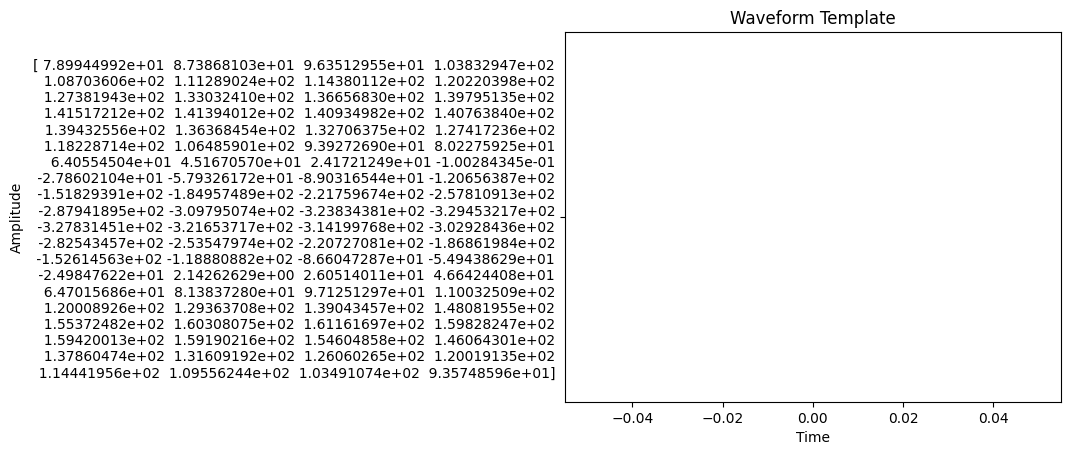

In [32]:
plt.plot(np.array(all_waveforms.iloc[0]['template']))
plt.title("Waveform Template")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
#all_waveforms.to_csv('/itet-stor/kvulic/neuronies/TANGO2/Processed_Data/Waveforms/waveform_metrics_all_recordings.csv')

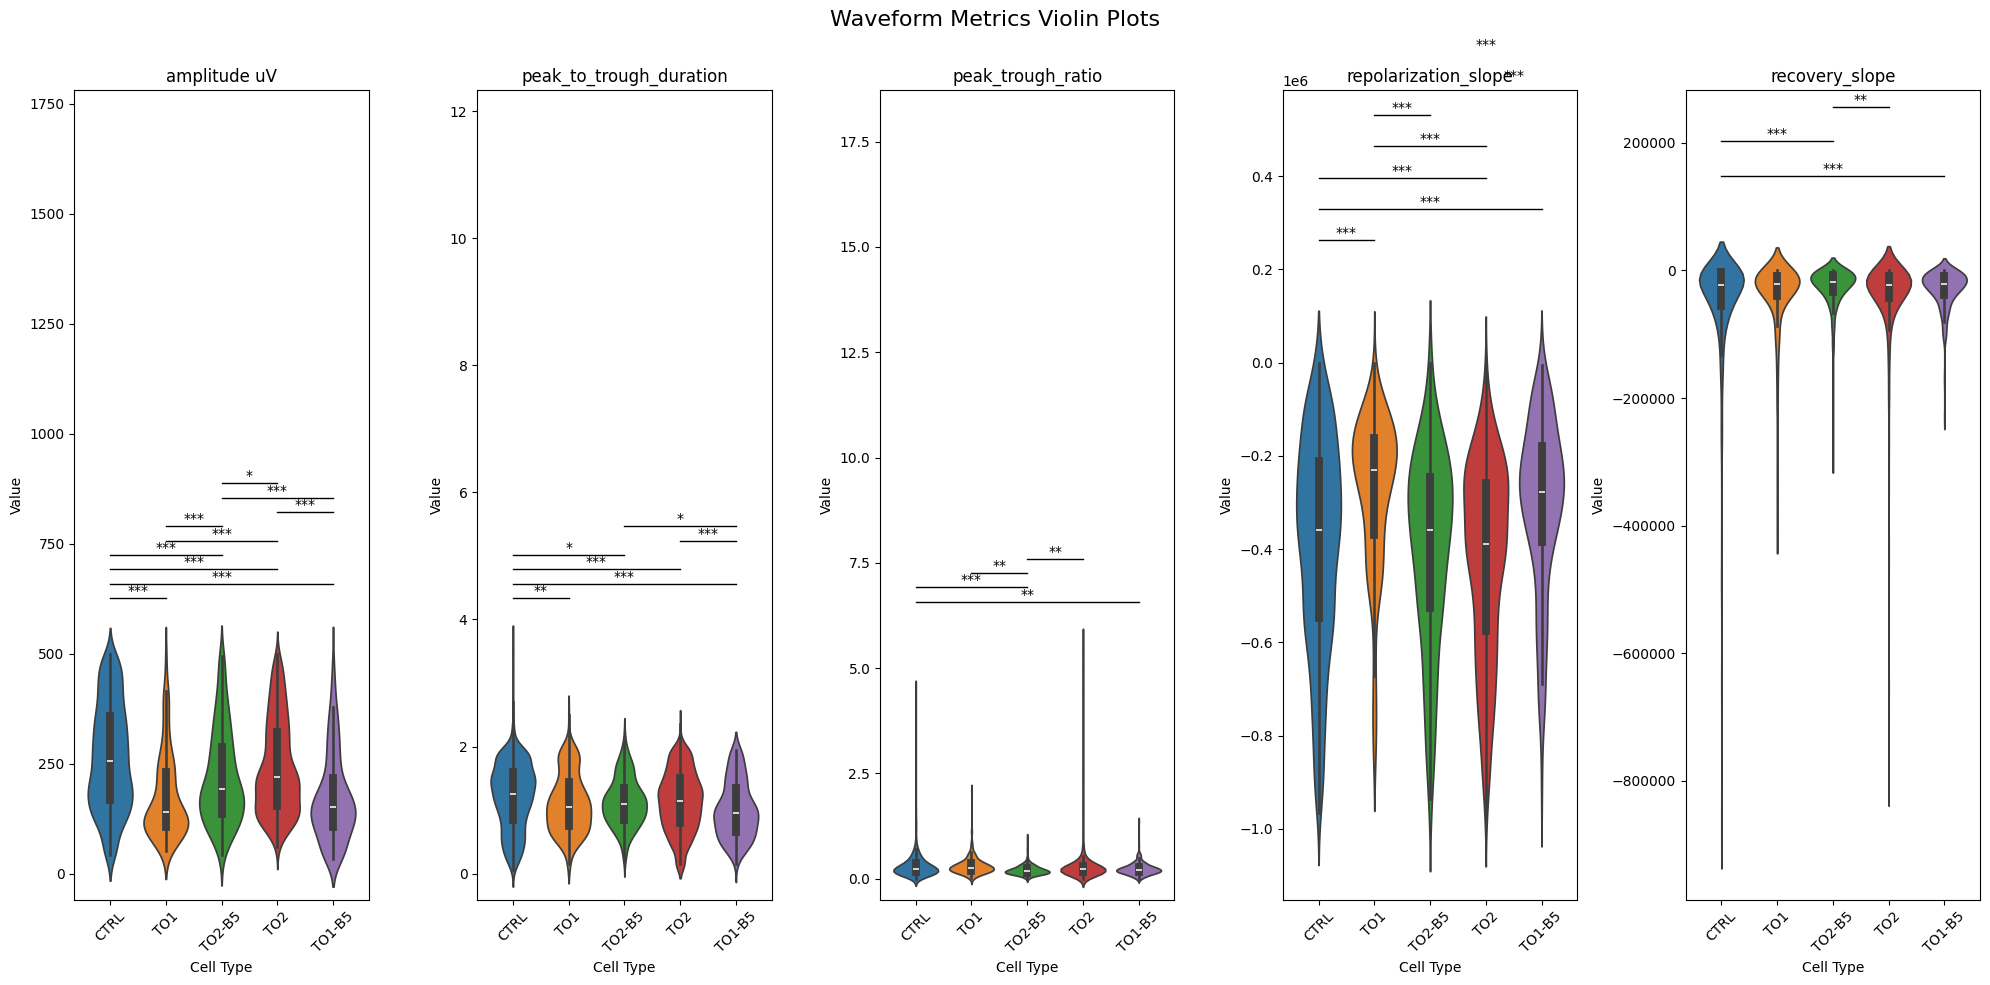

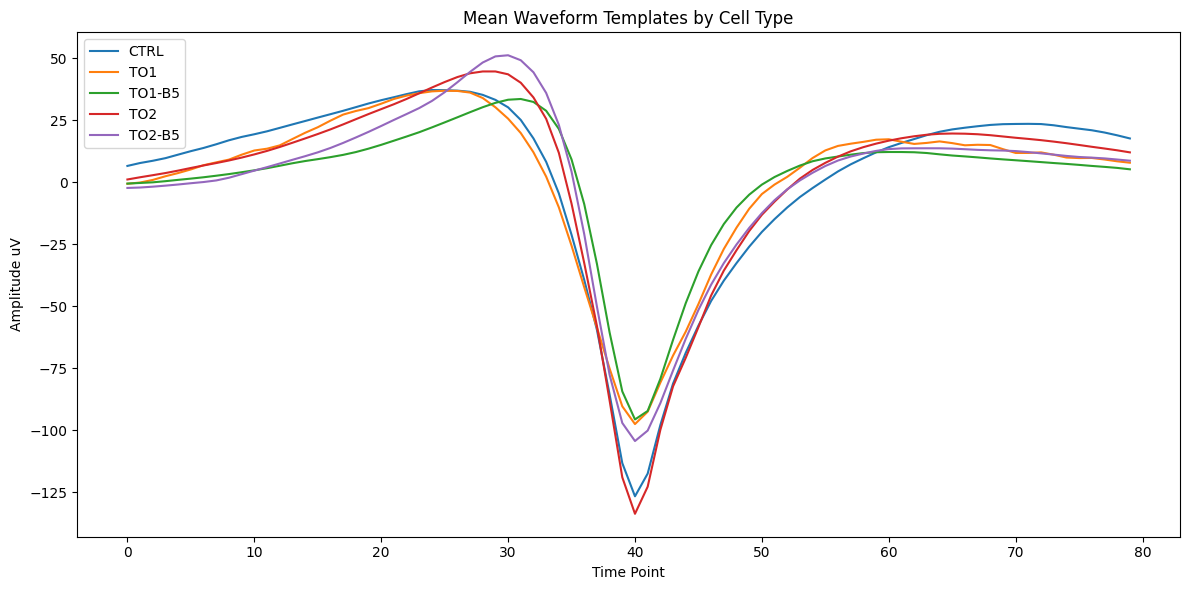

In [41]:
wfs_pickle = wfs_pickle[wfs_pickle['amplitude uV'] < 500].reset_index(drop=True)
wp.plot_metrics_violin_plots_w_test(wfs_pickle, metrics_to_plot)

# Plot mean templates
wp.plot_mean_templates(wfs_pickle)

In [39]:
#save all_waveforms as pickle
all_waveforms.to_pickle('/itet-stor/kvulic/neuronies/TANGO2/Processed_Data/Waveforms/waveform_metrics_all_recordings.pkl')

In [3]:
wfs_pickle = pd.read_pickle('/itet-stor/kvulic/neuronies/TANGO2/Processed_Data/Waveforms/waveform_metrics_all_recordings.pkl')
wfs_pickle

,Unnamed: 0,unit_id,chip_id,div,cell_type,network_id,peak_to_trough_duration,peak_trough_ratio,repolarization_slope,recovery_slope,peak_idx,trough_idx,amplitude uV,template,unit_index
0,0,7,1103,13,CTRL,11,1.35,0.489179,-543041.198730,-93439.483643,66,39,490.614930,"[78.9945, 87.38681, 96.351295, 103.83295, 108....",0
1,8,23,1103,13,CTRL,11,1.15,0.529383,-269975.372314,-129230.758667,63,40,221.347100,"[29.305162, 31.27347, 34.53726, 37.350956, 39....",8
2,11,3,1796,17,TO1,2,1.85,0.241468,-179737.365723,0.000000,77,40,106.845380,"[-12.428918, -9.702583, -8.340286, -7.963988, ...",0
3,12,4,1796,17,TO1,2,1.75,0.154417,-168915.618896,0.000000,75,40,112.462890,"[-12.799431, -10.84175, -9.195711, -8.423252, ...",1
4,21,11,1103,38,CTRL,10,1.80,0.280627,-322284.881592,0.000000,76,40,163.200840,"[3.2968636, 5.4520383, 7.7331796, 9.150459, 10...",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,5791,3,1796,18,TO1-B5,3,0.60,0.338559,-595845.703125,-21825.393677,52,40,299.674500,"[-9.825214, -28.397532, -47.248066, -59.883877...",3
3300,5793,6,1796,18,TO1-B5,3,0.55,0.318233,-277568.786621,-45008.884430,51,40,192.026640,"[-1.2744695, 0.32379836, 2.1361141, 2.610927, ...",5
3301,5794,7,1796,18,TO1-B5,3,0.75,0.560430,-205191.528320,-85240.959167,55,40,108.917816,"[-3.2293873, -2.7430377, -2.4705396, -2.312922...",6
3302,5795,9,1796,18,TO1-B5,3,0.90,0.289025,-184567.443848,-22112.655640,59,41,96.887560,"[-0.49445775, -0.71625596, -0.43099436, 1.3424...",7


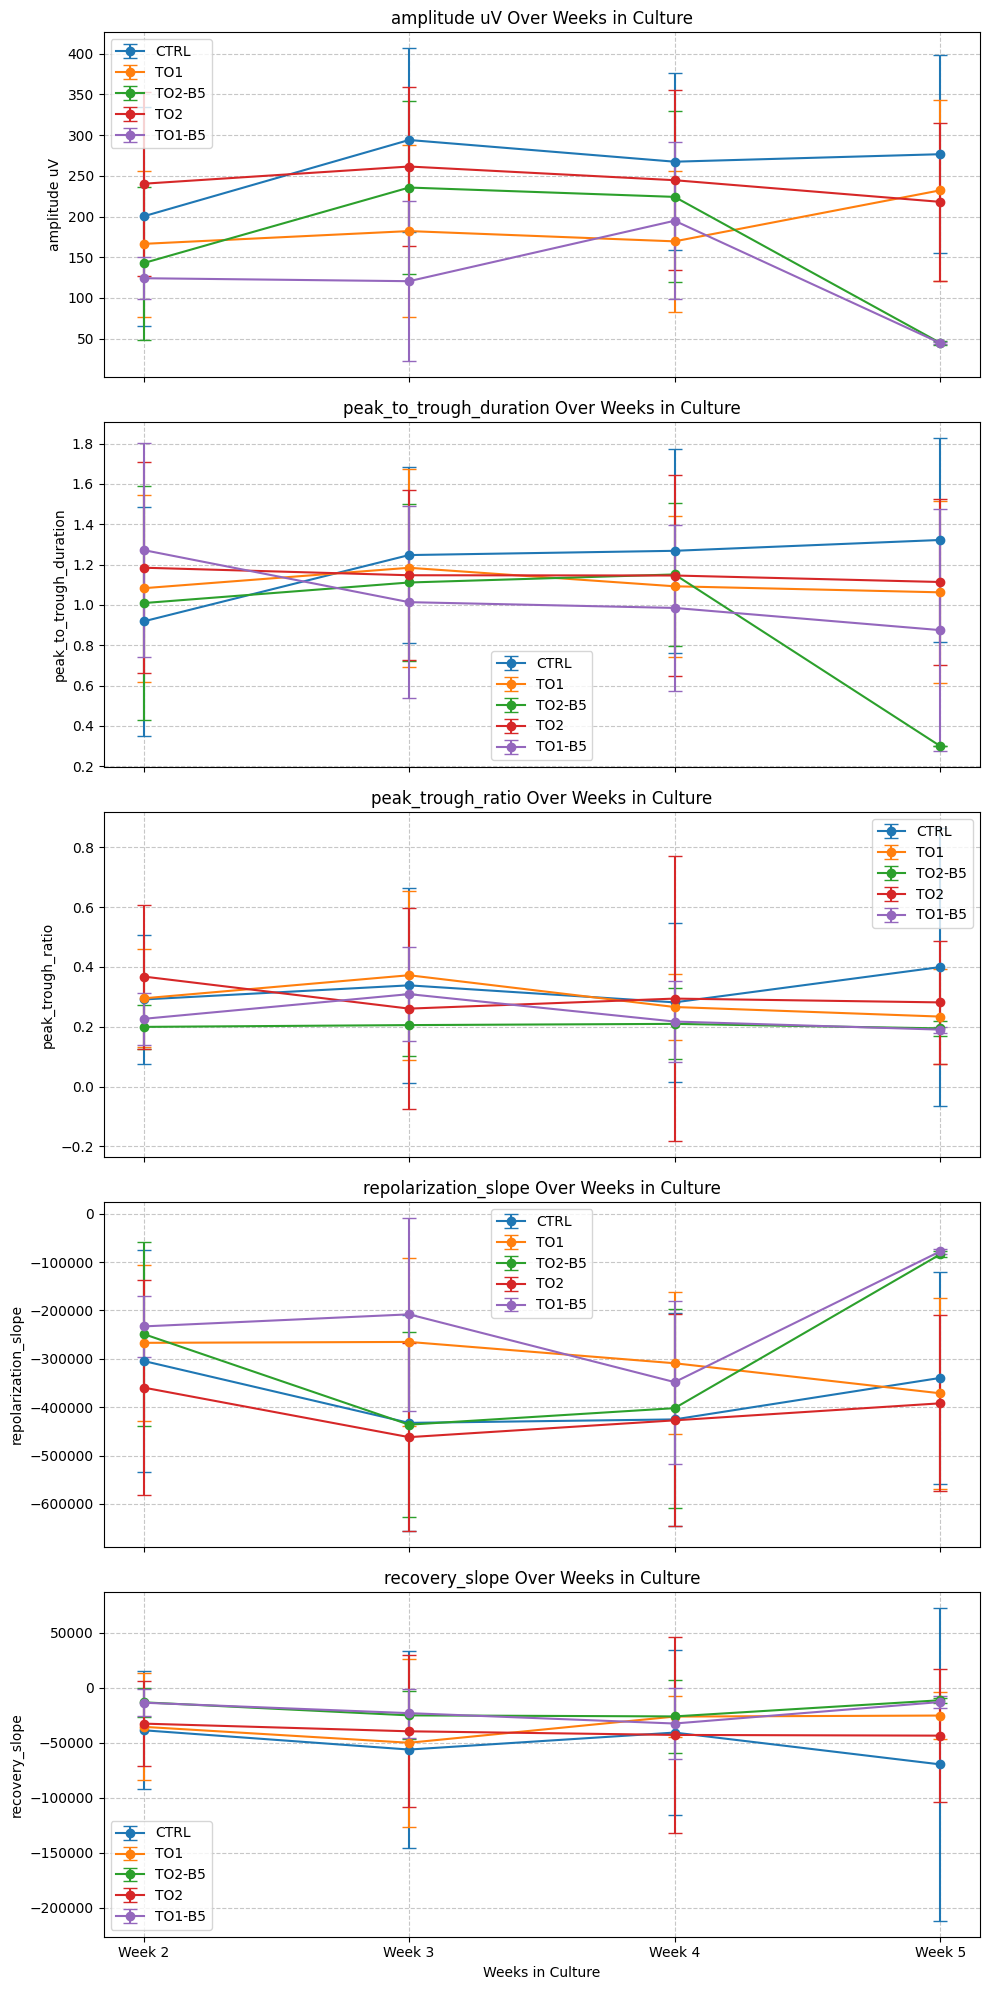

In [5]:
metrics_to_plot = [
    'amplitude uV', 
    'peak_to_trough_duration', 
    'peak_trough_ratio', 
    'repolarization_slope', 
    'recovery_slope'
]
wfs_pickle = wfs_pickle[wfs_pickle['amplitude uV'] < 500].reset_index(drop=True)
fig = wp.plot_metrics_over_weeks(wfs_pickle, metrics_to_plot)
plt.show()
